In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign_0__mal_1  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 31 columns]

Data Set Characteristics:
:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

In [4]:
df.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
benign_0__mal_1          569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

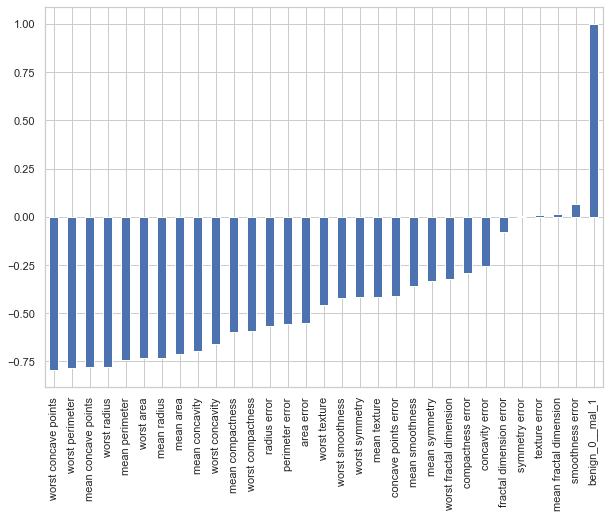

In [5]:
plt.figure(figsize=(10,7))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
plt.show()

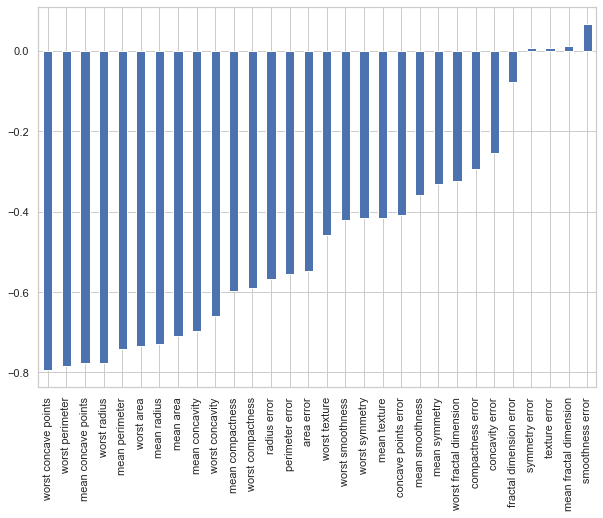

In [6]:
#drop the target variable
plt.figure(figsize=(10,7))
df.corr()['benign_0__mal_1'][:-1] .sort_values().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

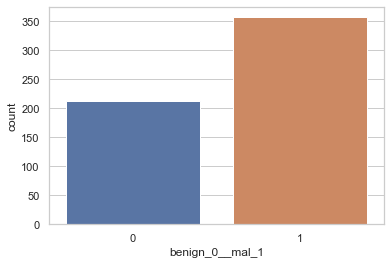

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

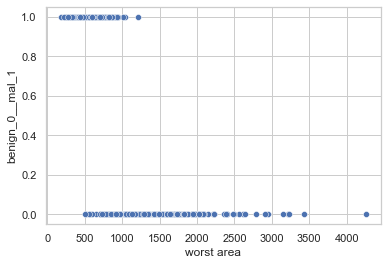

In [8]:
sns.scatterplot(x='worst area', y='benign_0__mal_1', data=df)

plt.show()

In [9]:
X=df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split



In [11]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
X_train=scaler.fit_transform(X_train)

In [15]:
X_test=scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense, Activation,Dropout

In [18]:
X_train.shape

(398, 30)

In [19]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#because of binary classification, the activation is 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
model.fit(x=X_train, y=y_train, epochs=600,
         validation_data=(X_test, y_test))

Epoch 1/600
13/13 [==============================] - 1s 12ms/step - loss: 0.6703 - val_loss: 0.6474
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6389 - val_loss: 0.6167
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6094 - val_loss: 0.5819
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5760 - val_loss: 0.5421
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5386 - val_loss: 0.4983
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4973 - val_loss: 0.4523
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4542 - val_loss: 0.4102
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4154 - val_loss: 0.3669
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3761 - val_loss: 0.3301
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3410 - val_loss: 0.2965
Epoch 11

In [21]:
losses=pd.DataFrame(model.history.history)

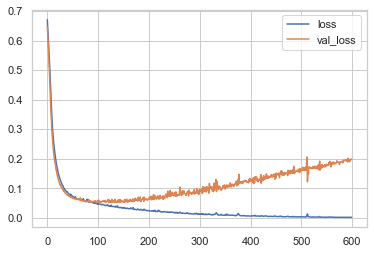

In [22]:
#example of overfitting next early stop will be applied
losses.plot()
plt.show()

In [23]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#because of binary classification, the activation is 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [26]:
early_stop =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, y=y_train, epochs=600,
         validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 19ms/step - loss: 0.6722 - val_loss: 0.6371
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5808
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5686 - val_loss: 0.5326
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5257 - val_loss: 0.4892
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4843 - val_loss: 0.4461
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4430 - val_loss: 0.4034
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4023 - val_loss: 0.3634
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3657 - val_loss: 0.3250
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3298 - val_loss: 0.2931
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.2989 - val_loss: 0.2659
Epoch 11

In [28]:
losses=pd.DataFrame(model.history.history)

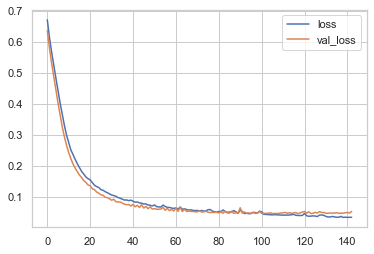

In [29]:
#overfitting is fixed
losses.plot()
plt.show()

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
model= Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))



#because of binary classification, the activation is 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(x=X_train, y=y_train, epochs=600,
         validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 12ms/step - loss: 0.6890 - val_loss: 0.6824
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6794 - val_loss: 0.6694
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6730 - val_loss: 0.6590
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6694 - val_loss: 0.6498
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6585 - val_loss: 0.6389
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6454 - val_loss: 0.6267
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6414 - val_loss: 0.6134
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6386 - val_loss: 0.6012
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6399 - val_loss: 0.5893
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6225 - val_loss: 0.5762
Epoch 11

In [33]:
losses=pd.DataFrame(model.history.history)

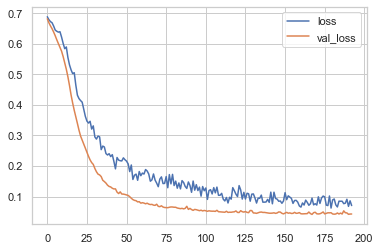

In [34]:
#overfitting is fixed, even better
losses.plot()
plt.show()

In [42]:
#pred=model.predict(X_test, axis=-1)  DEPRECATED

pred = np.argmax(model.predict(X_test), axis=-1)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        63
           1       0.00      0.00      0.00       108

    accuracy                           0.37       171
   macro avg       0.18      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



In [45]:
print(confusion_matrix(y_test,pred))

[[ 63   0]
 [108   0]]
